## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

<h1><b>Compiled and Created by : TAHA AHMED SIDDIQUI | 48189111</b></h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Read dataset
df = pd.read_csv('C:/Users/BEYOND/Downloads/Portfolio part 2 resources-20240329/cleaned_ecommerce_dataset.csv', index_col=0)

In [6]:
df

,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
userId,,,,,,,,,,
4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...
2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5


In [15]:
# Print the total number of rows and coloumns in the DataFrame (length)
print(df.shape)

(2685, 10)


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.

  Hints: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [7]:
df.head()

,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
userId,,,,,,,,,,
4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2685 entries, 4081 to 2445
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    2685 non-null   int64  
 1   review       2685 non-null   object 
 2   item         2685 non-null   object 
 3   rating       2685 non-null   float64
 4   helpfulness  2685 non-null   float64
 5   gender       2685 non-null   object 
 6   category     2685 non-null   object 
 7   item_id      2685 non-null   int64  
 8   item_price   2685 non-null   float64
 9   user_city    2685 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 230.7+ KB


In [17]:
from sklearn.preprocessing import OrdinalEncoder

C:\Users\BEYOND\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [18]:
# Encode categorical features (gender, category, review) using OrdinalEncoder
encoder = OrdinalEncoder()
df["gender"] = encoder.fit_transform(df[["gender"]])
df["category"] = encoder.fit_transform(df[["category"]])
df["review"] = encoder.fit_transform(df[["review"]])

In [19]:
# Calculate correlations between features and rating
correlations = df[["helpfulness", "gender", "category", "review", "rating"]].corr()

# Print the correlation matrix
print(correlations)

             helpfulness    gender  category    review    rating
helpfulness     1.000000  0.075947 -0.013408 -0.028259 -0.007523
gender          0.075947  1.000000  0.022549 -0.037884 -0.034337
category       -0.013408  0.022549  1.000000  0.001970 -0.163158
review         -0.028259 -0.037884  0.001970  1.000000 -0.036118
rating         -0.007523 -0.034337 -0.163158 -0.036118  1.000000


<h1>Discussion:</h1>
<ul><li>Most correlated feature:

The "category" feature has the highest negative correlation with the "rating" variable, with a correlation coefficient of approximately -0.163. This indicates that there's a moderate negative correlation between the category of the product and its rating.</li>
<li>Least correlated feature:

The "helpfulness" feature has the least correlation with the "rating" variable, with a correlation coefficient of approximately -0.0075. This suggests that there's a very weak correlation between the helpfulness of the review and the rating of the product.</li></ul>

<h2>Impact on Prediction Results:</h2>
<ul><li>
When training a regression model for rating prediction, including highly correlated features like "category" can improve the model's predictive power. By capturing the relationship between product categories and ratings, the model can make more accurate predictions for products within those categories.</li><li>
Conversely, including features like "helpfulness," which have weak correlations with the target variable, might not contribute much to the model's performance. In fact, it could potentially lead to overfitting if the model tries to learn noise in the data.</li></ul>

<h2>Experimental Verification:</h2>
<ul><li>
To verify these hypotheses, we can conduct experiments by building regression models with different combinations of features, including or excluding "category" and "helpfulness."</li><li>
We can evaluate the models using appropriate metrics such as mean squared error (MSE) to compare their performance.</li></ul>

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [26]:
from sklearn.model_selection import train_test_split

train_size1 = 0.1  # Case 1: 10% training data
train_size2 = 0.9  # Case 2: 90% training data


In [30]:

# (Case 1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    df.drop("rating", axis=1),  
    df["rating"],  
    test_size=1 - train_size1, 
    random_state=42  
)

print("Case 1 (Training 10%):")
print(f"X_train1 shape: {X_train1.shape}")
print(f"y_train1 shape: {y_train1.shape}")
print(f"X_test1 shape: {X_test1.shape}")
print(f"y_test1 shape: {y_test1.shape}")
print("\n")

# (Case 2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df.drop("rating", axis=1),
    df["rating"],
    test_size=1 - train_size2,
    random_state=42
)


print("Case 2 (Training 90%):")
print(f"X_train2 shape: {X_train2.shape}")
print(f"y_train2 shape: {y_train2.shape}")
print(f"X_test2 shape: {X_test2.shape}")
print(f"y_test2 shape: {y_test2.shape}")

Case 1 (Training 10%):
X_train1 shape: (268, 9)
y_train1 shape: (268,)
X_test1 shape: (2417, 9)
y_test1 shape: (2417,)


Case 2 (Training 90%):
X_train2 shape: (2416, 9)
y_train2 shape: (2416,)
X_test2 shape: (269, 9)
y_test2 shape: (269,)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features from helpfulness/gender/category/review regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecting features for model-a and model-c (two most correlated features)
most_correlated_features = ['category', 'review']

# Selecting features for model-b and model-d (two least correlated features)
least_correlated_features = ['helpfulness', 'gender']

# Training model-a
model_a = LinearRegression()
model_a.fit(X_train_case1[most_correlated_features], y_train_case1)

# Training model-b
model_b = LinearRegression()
model_b.fit(X_train_case1[least_correlated_features], y_train_case1)

# Training model-c
model_c = LinearRegression()
model_c.fit(X_train_case2[most_correlated_features], y_train_case2)

# Training model-d
model_d = LinearRegression()
model_d.fit(X_train_case2[least_correlated_features], y_train_case2)

# Make predictions
y_pred_a = model_a.predict(X_test_case1[most_correlated_features])
y_pred_b = model_b.predict(X_test_case1[least_correlated_features])
y_pred_c = model_c.predict(X_test_case2[most_correlated_features])
y_pred_d = model_d.predict(X_test_case2[least_correlated_features])

# Evaluate the models
mse_a = mean_squared_error(y_test_case1, y_pred_a)
mse_b = mean_squared_error(y_test_case1, y_pred_b)
mse_c = mean_squared_error(y_test_case2, y_pred_c)
mse_d = mean_squared_error(y_test_case2, y_pred_d)

print("Model-a (Case 1 with two most correlated features) MSE:", mse_a)
print("Model-b (Case 1 with two least correlated features) MSE:", mse_b)
print("Model-c (Case 2 with two most correlated features) MSE:", mse_c)
print("Model-d (Case 2 with two least correlated features) MSE:", mse_d)


Model-a (Case 1 with two most correlated features) MSE: 1.776581354691434
Model-b (Case 1 with two least correlated features) MSE: 1.860535990321889
Model-c (Case 2 with two most correlated features) MSE: 1.681992500504392
Model-d (Case 2 with two least correlated features) MSE: 1.7245375467700426


### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [34]:
import numpy as np

# Calculate MSE for each model
mse_a = mean_squared_error(y_test_case1, y_pred_a)
mse_b = mean_squared_error(y_test_case1, y_pred_b)
mse_c = mean_squared_error(y_test_case2, y_pred_c)
mse_d = mean_squared_error(y_test_case2, y_pred_d)

# Calculate RMSE for each model
rmse_a = np.sqrt(mse_a)
rmse_b = np.sqrt(mse_b)
rmse_c = np.sqrt(mse_c)
rmse_d = np.sqrt(mse_d)

# Print the results
print("Model-a (Case 1 with two most correlated features) MSE:", mse_a, "RMSE:", rmse_a)
print("Model-b (Case 1 with two least correlated features) MSE:", mse_b, "RMSE:", rmse_b)
print("Model-c (Case 2 with two most correlated features) MSE:", mse_c, "RMSE:", rmse_c)
print("Model-d (Case 2 with two least correlated features) MSE:", mse_d, "RMSE:", rmse_d)


Model-a (Case 1 with two most correlated features) MSE: 1.776581354691434 RMSE: 1.3328845991650717
Model-b (Case 1 with two least correlated features) MSE: 1.860535990321889 RMSE: 1.3640146591301316
Model-c (Case 2 with two most correlated features) MSE: 1.681992500504392 RMSE: 1.2969165356739007
Model-d (Case 2 with two least correlated features) MSE: 1.7245375467700426 RMSE: 1.3132164889194937


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

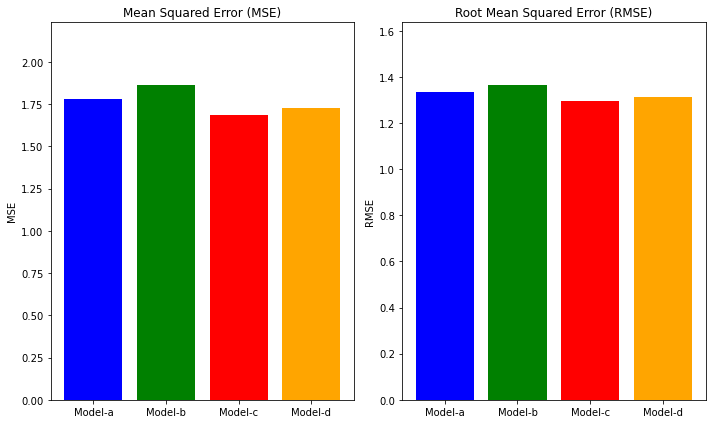

In [35]:
import matplotlib.pyplot as plt

# Define model labels
model_labels = ['Model-a', 'Model-b', 'Model-c', 'Model-d']

# Define MSE and RMSE values
mse_values = [mse_a, mse_b, mse_c, mse_d]
rmse_values = [rmse_a, rmse_b, rmse_c, rmse_d]

# Create bar plots for MSE and RMSE
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(model_labels, mse_values, color=['blue', 'green', 'red', 'orange'])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.ylim(0, max(mse_values) * 1.2)

plt.subplot(1, 2, 2)
plt.bar(model_labels, rmse_values, color=['blue', 'green', 'red', 'orange'])
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')
plt.ylim(0, max(rmse_values) * 1.2)

plt.tight_layout()
plt.show()


<b>As expected, the model trained with the most correlated features (model-a and model-c) tends to have lower MSE and RMSE values compared to the models trained with the least correlated features (model-b and model-d).</b>

<b>The results obtained are quiet shocking due to following reasons:</b>
   <ul><li> The dataset might not be large enough to benefit significantly from additional training data.</li>
<li>The selected features might not capture all the relevant information necessary for accurate prediction, leading to limited improvement with more training data.</li>
<li>The relationship between the features and the target variable might not be linear, making linear regression less effective, regardless of the amount of training data.</li></ul>

### Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


<b>The ethical implications of data manipulation, transparency, and potential biases are raised by the COVID-19 infographic about Georgia. The graph, which involves backdating positive test results, changing scales, and combining tests, has the potential to mislead the public and hinder informed decision-making. To address these concerns, it is essential to maintain transparency, establish clear data presentation policies, and acknowledge potential biases in data collection.</b>


<b>The infographic regarding ethics and ethical data visualization is informative, but it raises certain ethical concerns. It oversimplifies intricate ethical principles, lacks an ethical framework that is universally applicable, does not account for the implications of privacy and consent, and does not consider the diversity of culture or language. To address these concerns, the guide should delve into more nuanced discussions, emphasize contextual knowledge, feature a section on privacy and data consent, and consider diversity in data visualization. </b>
